In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
def music(CovMat,NA,NS,d,wavelen,Angles,scale="log",corr="false"):
    if corr!="false":
        J = np.flip(np.eye(NA), axis=1)
        CovMat = CovMat + np.dot(J, np.dot(CovMat.conj(), J))
    n, V = np.linalg.eig(CovMat)
    G = V[:, NS:NA]
    numAngles = Angles.size
    pspectrum = np.zeros(numAngles)
    e = np.zeros((NA, len(theta))) * 1j
    for i in range(NA):
        e[i, :] = np.exp(-2j * np.pi * d * np.sin(Angles) * i / wavelen)
    for i in range(numAngles):
        pspectrum[i] = 1 / np.linalg.norm((G.conj().transpose() @ e[:,i]))
    if scale=="log":
        pspectrum = 10 * np.log10(pspectrum / pspectrum.max())
    return pspectrum

In [126]:
def generate_data(NA, N, w, d, wavelen, doa, var=0.01):
    D = np.zeros((NA, w.size)) * 1j
    xx = np.zeros((w.size, N)) * 1j
    for i in range(NA):
        D[i, :] = np.exp(-2j * np.pi * d * np.sin(doa) * i / wavelen)
    for i in range(N):
        xx[:, i] = 2 * np.exp(1j * w * i)
    x = np.dot(D, xx)
    noise = np.random.normal(0, var, x.shape)
    return x+noise


In [127]:
doa = np.array([20, 60, 80]) * np.pi / 180
N = 200
w = np.array([ 1 / 5, 1 / 4, 1 / 3]) * np.pi
NA = 10
NS = w.size
wavelen = 150
d = wavelen / 2
var = 0.01
theta = np.arange(-np.pi / 2, np.pi / 2, 0.01)

Basic simulation of the MUSIC algorithm for DOA estimation

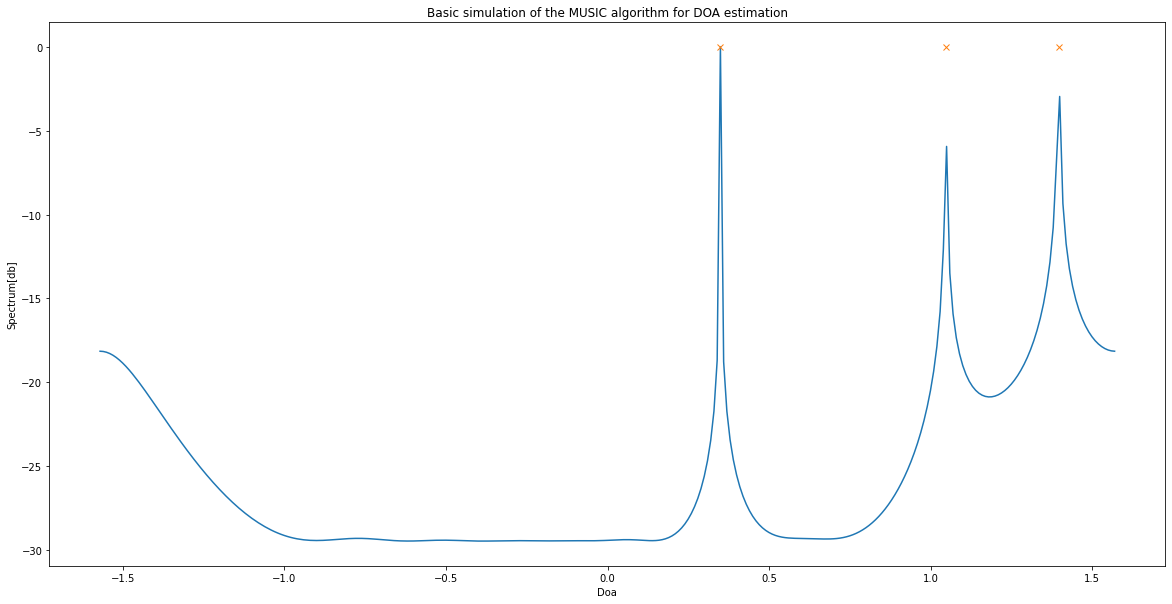

In [133]:
y = generate_data(NA,N,w,d,wavelen,doa,var)
CovMat=np.dot(y, np.transpose(np.conj(y)))
pspectrum= music(CovMat, NA, NS, d, wavelen, theta)
plt.figure(figsize=(20,10))
plt.plot(theta,pspectrum)
plt.plot(doa,(0,0,0),"x")
plt.title("Basic simulation of the MUSIC algorithm for DOA estimation")
plt.xlabel("Doa")
plt.ylabel("Spectrum[db]")
plt.show()

The relationship between the number of snapshots and DOA estimation:
* Snapshots=1, 5, 50, 200

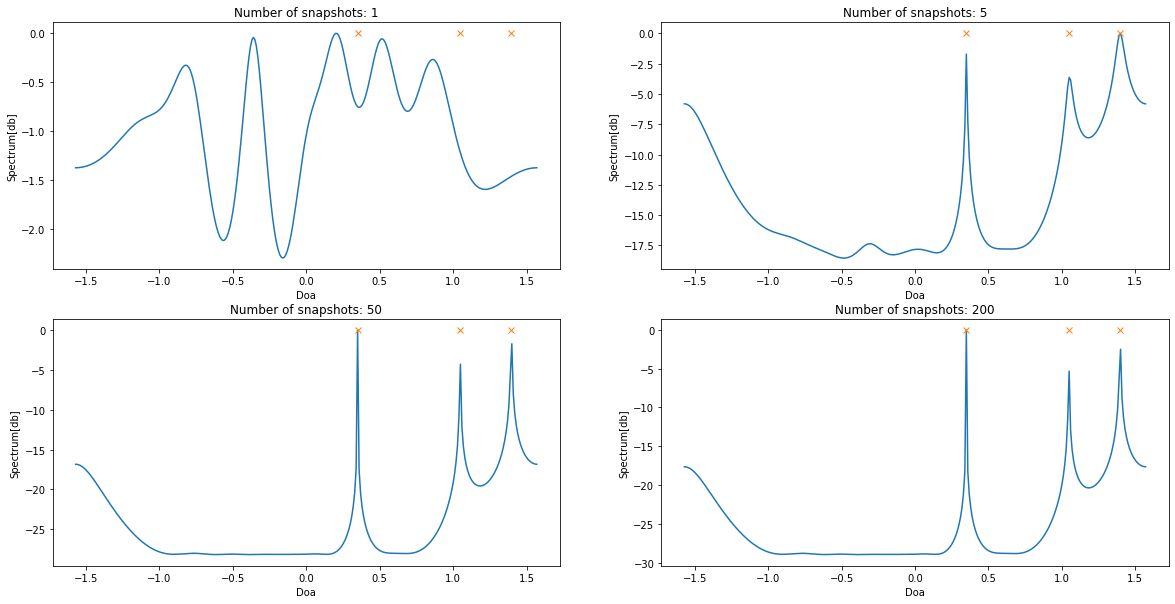

In [132]:
plt.figure(figsize=((20,10)))
snapshots = [1, 5, 50, 200]
for i, n in enumerate(snapshots):
    y = generate_data(NA, n, w, d, wavelen, doa, var)
    CovMat=np.dot(y, np.transpose(np.conj(y)))
    pspectrum= music(CovMat, NA, NS, d, wavelen, theta)
    plt.subplot(221+i)
    plt.plot(theta, pspectrum)
    plt.title("Number of snapshots: %d"%n)
    plt.plot(doa,(0,0,0),"x")
    plt.xlabel("Doa")
    plt.ylabel("Spectrum[db]")
plt.show()

The relationship between the number of microphones and DOA estimation:
* NA=5, 10, 50, 100

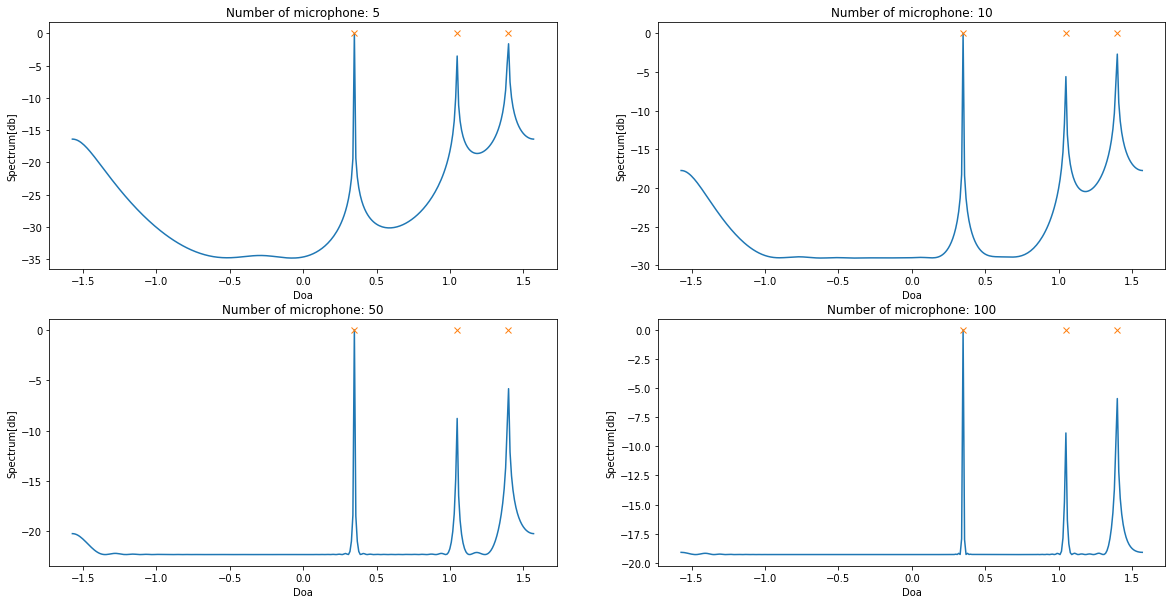

In [134]:
plt.figure(figsize=(20,10))
NAs=[5,10,50,100]
for i, na in enumerate(NAs):
    y = generate_data(na, N, w, d, wavelen, doa, var)
    CovMat=np.dot(y, np.transpose(np.conj(y)))
    pspectrum= music(CovMat, na, NS, d, wavelen, theta)
    plt.subplot(221+i)
    plt.plot(theta, pspectrum)
    plt.title("Number of microphone: %d"%na)
    plt.plot(doa,(0,0,0),"x")
    plt.xlabel("Doa")
    plt.ylabel("Spectrum[db]")
plt.show()

 The relationship between the microphone distance and DOA estimation:
 * D=Wavelen/8, Wavelen/4, Wavelen/2, Wavelen

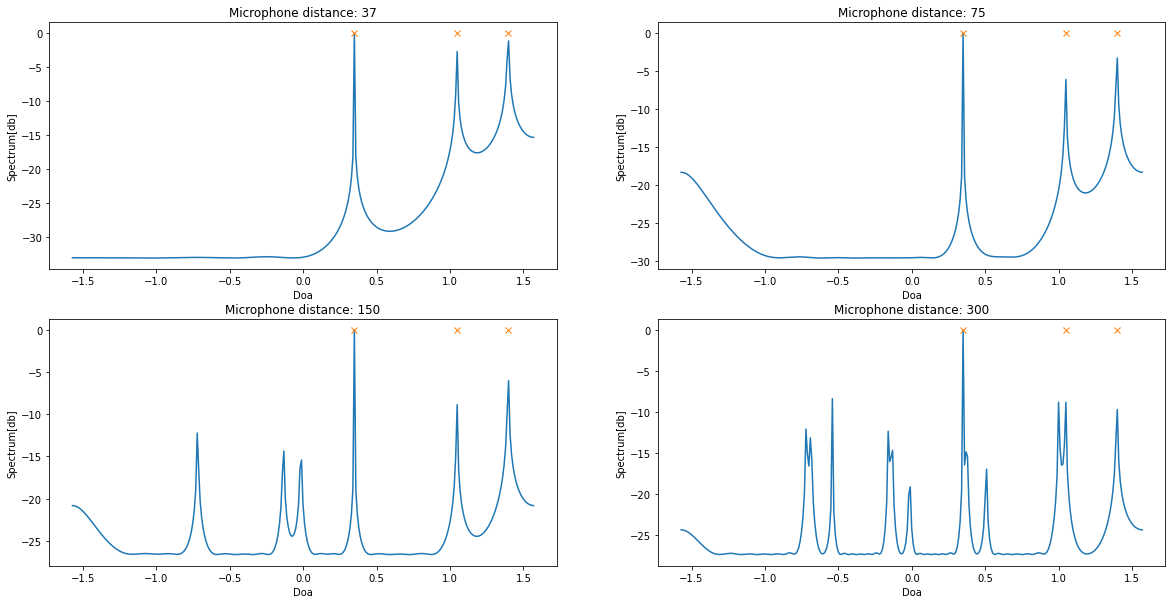

In [136]:
plt.figure(figsize=(20,10))
Ds=[wavelen/4,wavelen/2,wavelen,2*wavelen] 
for j,i in enumerate(Ds):
    y = generate_data(NA, N, w, i, wavelen, doa, var)
    CovMat=np.dot(y, np.transpose(np.conj(y)))
    pspectrum= music(CovMat, NA, NS, i, wavelen, theta)
    plt.subplot(221+j)
    plt.plot(theta, pspectrum)
    plt.title("Microphone distance: %d"%i)
    plt.plot(doa,(0,0,0),"x")
    plt.xlabel("Doa")
    plt.ylabel("Spectrum[db]")

plt.show()


The relationship between noise and DOA estimation:
* Var=0.01, 0.1, 1, 10

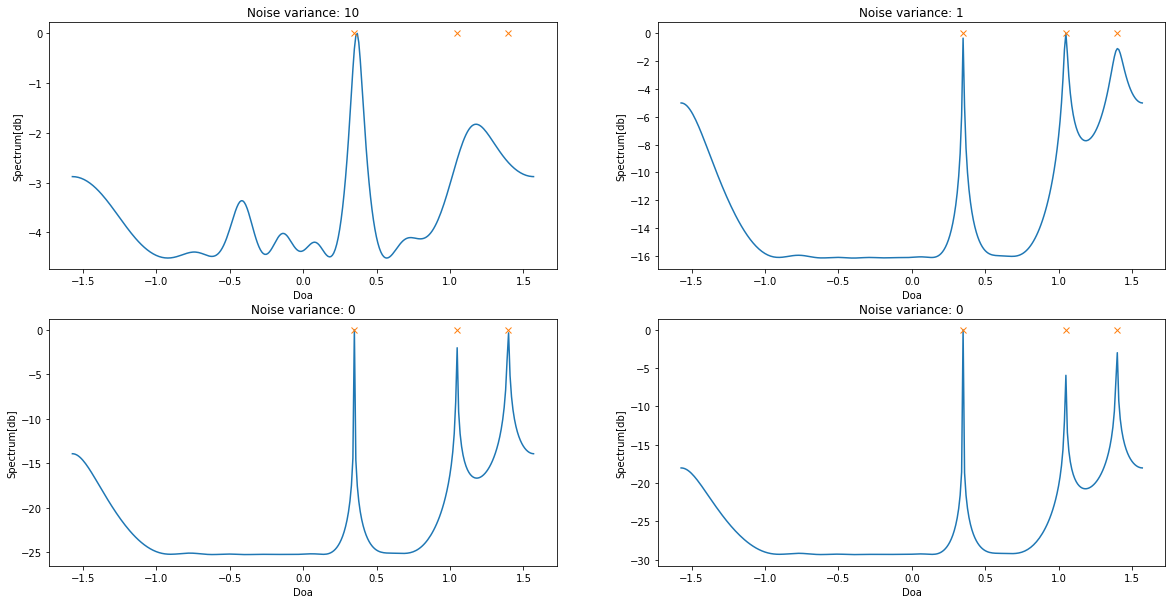

In [137]:
plt.figure(figsize=(20,10))
Vars=[10, 1, 0.1, 0.01]     
for i, v in enumerate(Vars):
  y = generate_data(NA, N, w, d, wavelen, doa, v)
  CovMat=np.dot(y, np.transpose(np.conj(y)))
  pspectrum= music(CovMat, NA, NS, d, wavelen, theta)
  plt.subplot(221+i)
  plt.plot(theta, pspectrum)
  plt.title("Noise variance: %d"%v)
  plt.plot(doa,(0,0,0),"x")
  plt.xlabel("Doa")
  plt.ylabel("Spectrum[db]")
plt.show()

 The relationship between the signal incident angle difference and DOA estimation:
 * IncidentAnglesDifferences=5,10,20,40


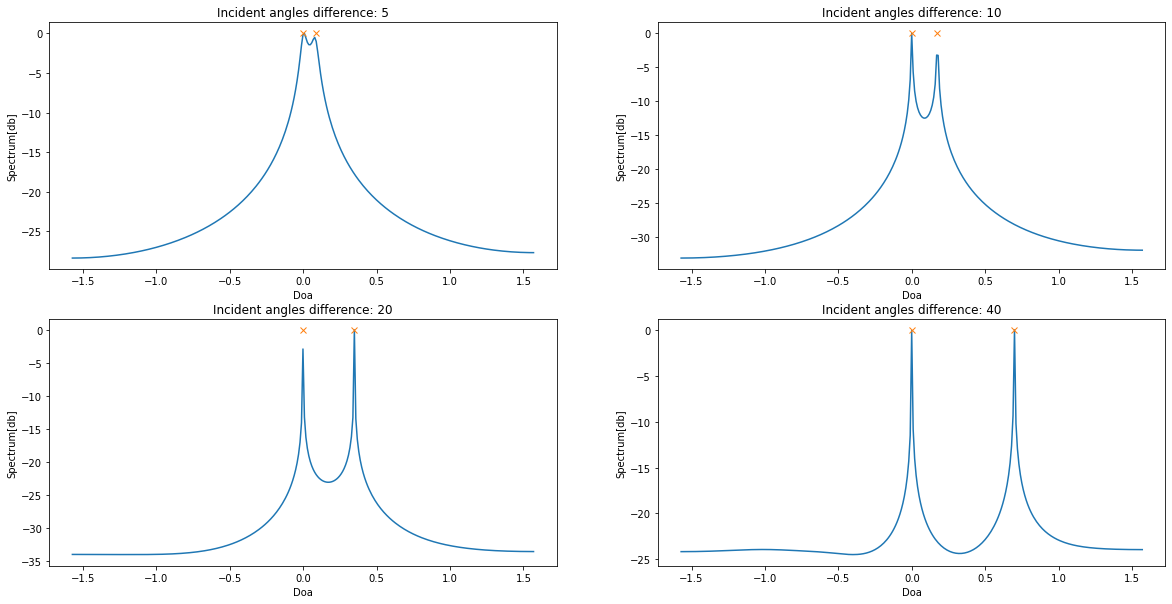

In [138]:
plt.figure(figsize=(20,10))
diff=[5,10,20,40]
f=np.array([1/4, 1/3]) * np.pi 
for i, d in enumerate(diff):
  angles=np.array([0,0+d]) * np.pi / 180
  y = generate_data(NA, N, f, d, wavelen, angles, var)
  CovMat=np.dot(y, np.transpose(np.conj(y)))
  pspectrum= music(CovMat, NA, NS, d, wavelen, theta)
  plt.subplot(221+i)
  plt.plot(theta, pspectrum)
  plt.title("Incident angles difference: %d"%d)
  plt.plot(angles,(0,0),"x")
  plt.xlabel("Doa")
  plt.ylabel("Spectrum[db]")
plt.show()

 The DOA estimation for coherent signals


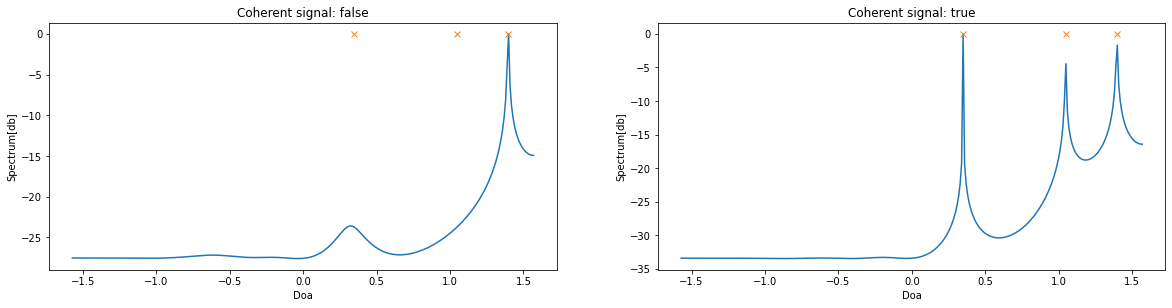

In [139]:
plt.figure(figsize=(20,10))
f=np.array([ 1 / 4, 1 / 4, 1 / 3]) * np.pi
for i, corr in enumerate(["false", "true"]):
    y = generate_data(NA, N, f, d, wavelen, doa, var)
    CovMat=np.dot(y, np.transpose(np.conj(y)))
    pspectrum= music(CovMat, NA, NS, d, wavelen, theta, corr=corr)
    plt.subplot(221+i)
    plt.plot(theta, pspectrum)
    plt.title("Coherent signal: %s"%corr)
    plt.plot(doa,(0,0,0),"x")
    plt.xlabel("Doa")
    plt.ylabel("Spectrum[db]")
plt.show()